## Amazon Products Sales: EDA and Visualisation

In [118]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [119]:
df=pd.read_csv("extracted_product_info_amazon.csv")

In [80]:
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",acer,23.8 Inches,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",acer,31.5 Inches,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",acer,27 Inches,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",SAMSUNG,31.5 Inches,4K UHD 2160p,16:9,4.3,279.99


### EDA

In [120]:
df.shape

(947, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         947 non-null    object
 1   Brand         947 non-null    object
 2   Screen Size   947 non-null    object
 3   Resolution    947 non-null    object
 4   Aspect Ratio  947 non-null    object
 5   Rating        947 non-null    object
 6   Price         947 non-null    object
dtypes: object(7)
memory usage: 51.9+ KB


In [121]:
df.isnull()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
942,False,False,False,False,False,False,False
943,False,False,False,False,False,False,False
944,False,False,False,False,False,False,False
945,False,False,False,False,False,False,False


In [122]:
df.isnull().sum()

Title           0
Brand           0
Screen Size     0
Resolution      0
Aspect Ratio    0
Rating          0
Price           0
dtype: int64

In [85]:
df['Price'].unique()

array(['94.99', '259.99', '99.99', '199.97', '279.99', '169.99', '299.99',
       '109.99', '262.00', '89.99', '179.97', '601.99', '129.99',
       '157.99', '399.99', '185.92', '299.81', '348.95', '64.99', '99.00',
       '179.99', '199.00', '237.33', '85.99', '159.99', '159.00',
       '1,190.99', '332.89', '349.99', '219.99', '339.99', '119.95',
       '249.99', '99.62', '104.99', '129.97', '199.99', '169.97',
       '896.99', '99.42', '128.95', '148.14', '109.77', '127.99', '79.99',
       '549.99', '449.99', '348.28', '279.00', '754.00', '420.01',
       '72.90', '149.99', '249.00', '205.49', '369.99', '345.64',
       '169.00', '427.00', '197.34', '147.35', '898.79', '1,028.00',
       '269.99', '299.00', '289.99', '127.76', '549.00', '239.99',
       '297.48', '229.99', '189.43', '241.00', '699.00', '229.00',
       '344.99', '499.99', '72.99', '329.99', '529.99', '321.09',
       '212.70', '119.97', '187.99', '316.00', '614.00', '105.69',
       '205.00', '184.70', '379.99', '9

In [123]:
df['Price']=df['Price'].str.replace(',','').astype(float)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         947 non-null    object 
 1   Brand         947 non-null    object 
 2   Screen Size   947 non-null    object 
 3   Resolution    947 non-null    object 
 4   Aspect Ratio  947 non-null    object 
 5   Rating        947 non-null    object 
 6   Price         947 non-null    float64
dtypes: float64(1), object(6)
memory usage: 51.9+ KB


In [124]:
df. Rating .value_counts()

Rating
4.6         368
4.5         183
4.4         163
4.2          89
Previous     35
4.3          29
5.0          15
4.7          13
3.9           9
4.1           7
4.0           7
3.5           5
3.8           5
3.7           4
3.6           3
3.4           2
2.0           2
3.3           1
4.8           1
2.2           1
3.0           1
5             1
1.0           1
3.1           1
3.2           1
Name: count, dtype: int64

In [125]:
df['Rating']=df['Rating'].replace('previous',np.nan)


In [90]:
Rating_mode= df['Rating'].mode()[0]
df['Rating'] = df['Rating'].fillna(Rating_mode)

In [91]:
df['Brand']

0           acer
1           acer
2           acer
3        Sceptre
4        SAMSUNG
         ...    
942         acer
943         ASUS
944         acer
945         acer
946    ViewSonic
Name: Brand, Length: 947, dtype: object

In [126]:
df['Brand'].unique()

array(['acer', 'Sceptre', 'SAMSUNG', 'ViewSonic', 'LG', 'AOC', 'Dell',
       'ASUS', 'Teamgee', 'SANSUI', 'KYY', 'Cevaton', 'BenQ', 'domyfan',
       'cocopar', 'CIDETTY', 'Philips Computer Monitors', 'KOORUI', 'QQH',
       'AOPEN', 'MSI', 'Alienware', 'kasorey', 'BOSII', 'Macsecor',
       'GIGABYTE', 'Lenovo', 'CRUA', 'INNOCN', 'HP', 'XGaming', 'ARZOPA',
       'Deco Gear', 'Poly', 'Kensington', 'Pixio', 'KTC', 'MP',
       'SideTrak', 'ANGEL POS', 'LESOWN', 'TouchWo', 'Tilta', 'Duex',
       'Z Z-EDGE', 'InnoView', 'Planar', 'PHILIPS', 'NEC', 'Neway',
       'Fiodio', 'Elo', 'LILLIPUT', 'ALOGIC', 'Thermaltake', 'AUO',
       'DIYmalls', 'Targus', 'Anmite', 'Atdec', 'iChawk',
       'Axis Communications'], dtype=object)

In [127]:
df['Brand']=df['Brand'].str.capitalize()

In [128]:
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",Acer,23.8 Inches,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",Acer,31.5 Inches,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",Acer,27 Inches,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30 Inches,FHD 1080p Ultra Wide,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",Samsung,31.5 Inches,4K UHD 2160p,16:9,4.3,279.99


In [95]:
df['Screen Size'] =df['Screen Size'].str.split(' ').str[0].astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         947 non-null    object 
 1   Brand         947 non-null    object 
 2   Screen Size   947 non-null    float64
 3   Resolution    947 non-null    object 
 4   Aspect Ratio  947 non-null    object 
 5   Rating        947 non-null    object 
 6   Price         947 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.9+ KB


In [129]:
resol=pd.DataFrame(df['Resolution'].value_counts()).reset_index()
resol=resol[(resol['count']/df.shape[0])*100>1.0]

In [98]:
resol_cat=resol['Resolution'].tolist()
resol_cat

['FHD 1080p', '4K UHD 2160p', 'QHD Wide 1440p', 'QHD Ultra Wide 1440p']

In [99]:
#replacing rare Categories by 'Other' in Resolution Column
df['Resolution'] = np.where(df['Resolution'].isin(resol_cat), df['Resolution'], 'Other')

In [130]:
df.Resolution.value_counts()

Resolution
FHD 1080p                          566
4K UHD 2160p                       165
QHD Wide 1440p                      74
QHD Ultra Wide 1440p                64
HD                                   7
UXGA Wide                            6
Full HD                              6
FHD 1080i                            4
2K DCI 1080p                         4
QXGA Wide                            4
5K QHD 1440p                         3
SXGA                                 3
SXGA+ Wide                           3
VGA                                  3
FHD 1080p Ultra Wide                 3
4K DCI 2160p                         3
SVGA                                 2
4K UHD 1600p Ultra Wide              2
SXGA, HD                             2
XGA                                  2
4K UHD                               1
XGA+ Wide                            1
3000                                 1
4K UHD 2160p, HD                     1
5K UHD 2160p Ultra Wide              1
480 x 272     

In [101]:
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",Acer,23.8,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",Acer,31.5,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",Acer,27.0,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30.0,Other,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",Samsung,31.5,4K UHD 2160p,16:9,4.3,279.99


In [102]:
df['Aspect Ratio'].unique()

array(['16:9', '21:9', '32:9', '2.35:1', '1.77:1', '16:10', 'Unknown',
       '4:3', '2.30:1', '17:9', '1.38:1', '1.78:1', '2.40:1', '1.27:1',
       '1.76:1', '1:1'], dtype=object)

In [103]:
df['Aspect Ratio'].value_counts()

Aspect Ratio
16:9       833
21:9        70
16:10       16
4:3          6
32:9         4
Unknown      4
1.78:1       4
2.35:1       2
1.77:1       1
2.30:1       1
17:9         1
1.38:1       1
2.40:1       1
1.27:1       1
1.76:1       1
1:1          1
Name: count, dtype: int64

In [104]:
ratios=pd.DataFrame(df["Aspect Ratio"].value_counts()).reset_index()
ratios=ratios[(ratios['count']/df.shape[0])*100.0>1]
ratios_cat=ratios["Aspect Ratio"].tolist()


In [105]:
df['Aspect Ratio'] = np.where(df['Aspect Ratio'].isin(ratios_cat), df['Aspect Ratio'], 'Unknown')

In [106]:
df['Aspect Ratio'].value_counts()

Aspect Ratio
16:9       833
21:9        70
Unknown     28
16:10       16
Name: count, dtype: int64

In [107]:
df.head()

,Title,Brand,Screen Size,Resolution,Aspect Ratio,Rating,Price
0,"acer SB240Y G0bi 23.8"" IPS Full HD Ultra-Slim ...",Acer,23.8,FHD 1080p,16:9,4.4,94.99
1,"acer Nitro 31.5"" FHD 1920 x 1080 1500R Curved ...",Acer,31.5,FHD 1080p,16:9,4.6,259.99
2,"Acer SB272 EBI 27"" Full HD (1920 x 1080) IPS Z...",Acer,27.0,FHD 1080p,16:9,4.5,99.99
3,Sceptre 30-inch Curved Gaming Monitor 21:9 256...,Sceptre,30.0,Other,21:9,4.5,199.97
4,"SAMSUNG 32"" UJ59 Series 4K UHD (3840x2160) Com...",Samsung,31.5,4K UHD 2160p,16:9,4.3,279.99


### data VISUALISATION

In [108]:
sales_count=df.Title.value_counts().reset_index()
sales_count['Title']=sales_count['Title'].str[:20]


In [109]:
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_palette('mako')

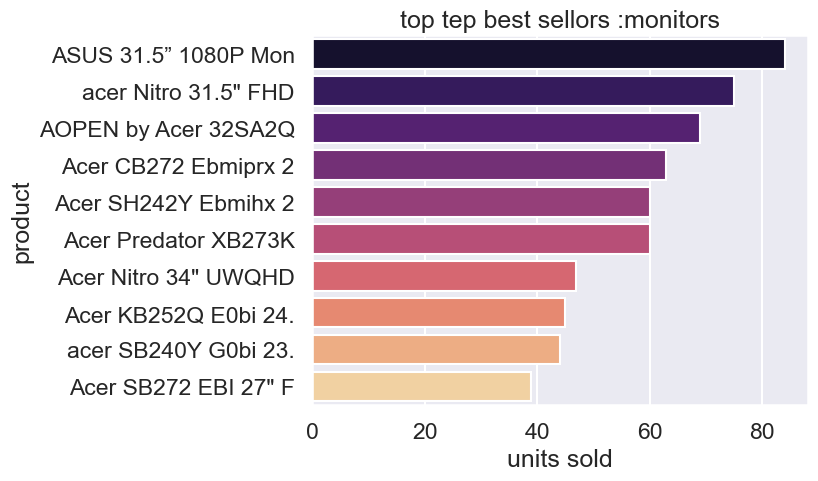

In [110]:
sns.barplot(data=sales_count[:10], y='Title' ,x='count',palette='magma')
plt.xlabel('units sold')
plt.ylabel('product')
plt.title('top tep best sellors :monitors')
plt.show()

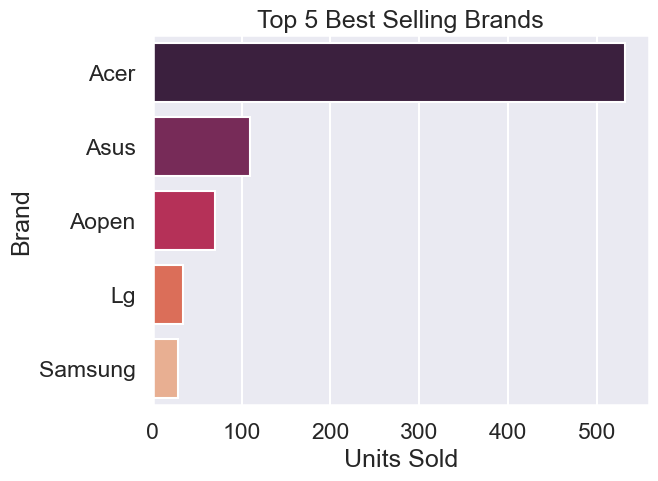

In [111]:
#best selling Brands
brands_count = df.Brand.value_counts().reset_index()

sns.barplot(data= brands_count[:5] , y='Brand' , x='count' , palette='rocket' )
plt.xlabel('Units Sold')
plt.ylabel('Brand')
plt.title('Top 5 Best Selling Brands')
plt.show()

d:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'screen size distribution in market')

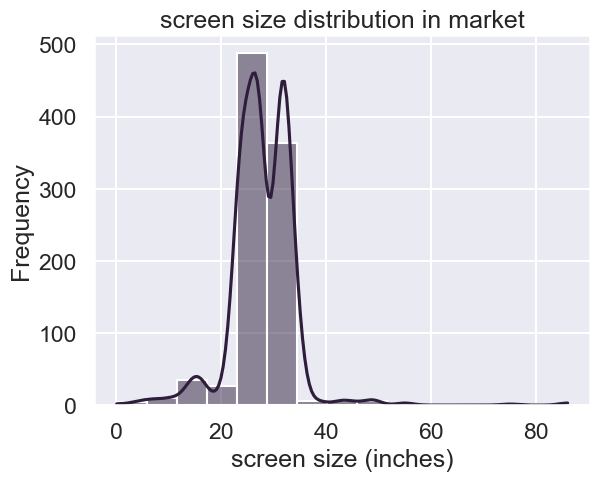

In [114]:
sns.histplot(data=df, x='Screen Size',kde='true', bins=15)
plt.xlabel('screen size (inches)')
plt.ylabel('Frequency')
plt.title('screen size distribution in market')


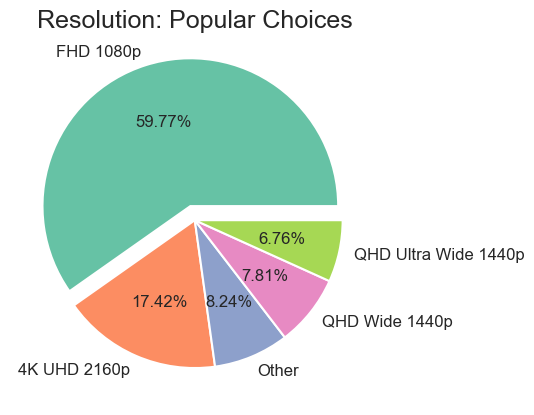

In [116]:
# pie chart : most popular Screen Resolution
temp = df['Resolution'].value_counts().reset_index()
labels= temp['Resolution'].tolist()
counts= temp['count'].tolist()

palette = sns.color_palette("Set2", n_colors=5)
explode=[0.1,0,0,0,0]

plt.pie(counts, labels=labels, autopct='%1.2f%%',explode=explode, colors=palette, textprops={ 'fontsize': 12})
plt.title('Resolution: Popular Choices')
plt.show()

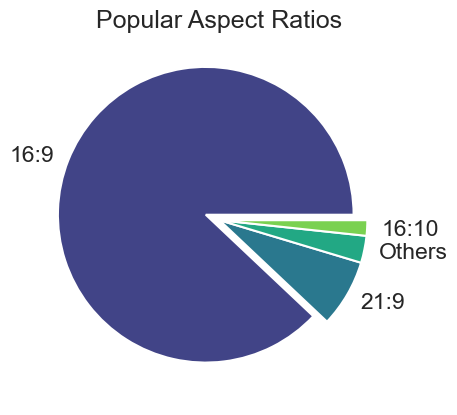

In [117]:
tempo = df['Aspect Ratio'].value_counts().reset_index()
labels= ['16:9','21:9','Others','16:10']
counts= tempo['count'].tolist()

palette = sns.color_palette("viridis", n_colors=4)
explode=[0.1,0,0,0]

plt.pie(counts, labels=labels,explode=explode, colors=palette)
plt.title('Popular Aspect Ratios')
plt.show()